# Advanced Statistical Analysis and Visualization of Group Data

This notebook serves as a comprehensive guide for conducting advanced statistical analysis and data visualizations.

### Importing and Setting Up Modules for Statistical Analysis

In [1]:
import sys
import os
import importlib

sys.path.insert(0, os.path.abspath('../src'))

import scripts.statistical_analysis
import configs

importlib.reload(sys.modules['scripts.statistical_analysis'])
importlib.reload(sys.modules['configs.config'])

from scripts.statistical_analysis import StatisticalAnalysis
from configs import config

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

### Loading and Previewing Cleaned Data

In [2]:
analysis = StatisticalAnalysis('../data/clean/cleaned_data.xlsx')
df_clean = analysis.load_clean_data()


df_subset_bmi_puls = analysis.generate_subset(config.columns_q1)
df_subset_priohand = analysis.generate_subset(config.columns_q2)
df_subset_geschlecht_wassermenge = analysis.generate_subset(config.columns_q3)
df_subset_blink = analysis.generate_subset(config.columns_q4)
df_subset_geschlecht_blink = analysis.generate_subset(config.columns_q5)
df_subset_height_luft = analysis.generate_subset(config.columns_q6)
df_subset_prio_luft = analysis.generate_subset(config.columns_q7)

df_clean.head()


,Gesamtgruppe,Type,Gruppe,Geschlecht,Geb.-Datum,"Alter, Jahre","Körpergröße, cm","Gewicht, Kg",BMI,Ruhepuls,Fußlänge Rechts (cm),Fußlänge Links (cm),Handlänge Rechts (cm),Handlänge Links (cm),Priorisierte Hand,Wassermenge (ml/Tag),Stamina Rechts (s),Stamina Links (s),Luftanhalten (s),Häufigkeit Blinzeln (/min)
0,1,Studierende,1,männlich,2005-01-20,19,160,58.0,22.7,56.0,24.0,24.0,17.0,17.0,rechsthänder,1400.0,180.0,160.0,53.0,34.137931
1,2,Studierende,1,männlich,2001-08-26,22,184,69.0,20.4,60.0,26.0,26.0,18.0,18.0,rechsthänder,1000.0,365.0,275.0,120.0,45.517241
2,3,Studierende,1,weiblich,2003-12-17,20,178,69.0,21.8,56.0,27.0,27.0,18.0,18.0,rechsthänder,1500.0,160.0,140.0,60.0,10.344828
3,4,Studierende,1,männlich,2004-01-01,20,187,92.0,26.3,72.0,28.0,28.0,20.0,20.0,rechsthänder,3000.0,NaN,NaN,85.0,NaN
4,5,Studierende,1,weiblich,2004-06-03,20,169,73.0,25.6,68.0,25.8,26.3,18.2,18.4,rechsthänder,2500.0,150.0,115.0,51.5,8.793103


## Descriptive statitics

#### Scale Types of Data

- **Nominal**: Categories without a meaningful order.
  - Type (Type of participants)
  - Geschlecht (Gender)
  - Priorisierte Hand (Dominant Hand)

- **Ordinal**: Categories with a meaningful order but no consistent difference between them.
  - Gruppe (Group)

- **Interval**: Numerical values with consistent differences but no true zero.
  - None in this dataset.

- **Ratio**: Numerical values with a true zero and consistent differences.
  - Alter, Jahre (Age in years)
  - Körpergröße, cm (Height in cm)
  - Gewicht, Kg (Weight in Kg)
  - BMI
  - Ruhepuls (Resting Heart Rate)
  - Fußlänge Rechts (cm) (Foot Length Right)
  - Fußlänge Links (cm) (Foot Length Left)
  - Handlänge Rechts (cm) (Hand Length Right)
  - Handlänge Links (cm) (Hand Length Left)
  - Wassermenge (ml/Tag) (Water Intake per Day)
  - Stamina Rechts (s) (Stamina Right Hand)
  - Stamina Links (s) (Stamina Left Hand)
  - Luftanhalten (s) (Breath Holding Duration)
  - Häufigkeit Blinzeln (/min) (Blink Frequency per Minute)


### Calculate descriptive statistics for Group 1, 2 and overall 

In [3]:
# Group data
group1 = df_clean[df_clean['Gruppe'] == 1]
group2 = df_clean[df_clean['Gruppe'] == 2]
overall = df_clean

#### Descriptive statistics for Group 1

In [4]:
# Calculate descriptive statistics
descriptive_stats_group1 = analysis.descriptive_stats(group1, config.numeric_columns)


# Display the descriptive statistics using the display function from IPython
display(descriptive_stats_group1)


,count,mean,std,min,25%,50%,75%,max
Gesamtgruppe,74.0,38.07,21.94,1.00,19.25,38.50,56.75,75.00
Gruppe,74.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
"Alter, Jahre",74.0,22.89,2.61,18.00,21.00,22.50,24.00,31.00
"Körpergröße, cm",74.0,172.11,10.62,155.00,164.25,170.00,178.00,204.00
"Gewicht, Kg",74.0,70.04,15.91,43.00,58.00,69.00,80.00,130.00
BMI,74.0,23.64,4.86,17.50,20.42,23.00,24.92,47.20
Ruhepuls,71.0,68.72,9.76,51.00,63.00,69.00,74.00,98.00
Fußlänge Rechts (cm),68.0,24.98,1.87,22.00,23.50,25.00,26.05,30.00
Fußlänge Links (cm),68.0,24.99,1.89,22.00,23.38,25.00,26.00,30.00
Handlänge Rechts (cm),68.0,17.90,1.73,16.00,17.00,18.00,18.50,28.00


#### Descriptive statistics for Group 2

In [5]:
descriptive_stats_group2 = analysis.descriptive_stats(group2, config.numeric_columns)


columns_to_display = ['Gesamtgruppe', 'Gruppe', 'Alter, Jahre', 'Körpergröße, cm', 'Gewicht, Kg', 'BMI', 'Ruhepuls']
descriptive_stats_group2 = descriptive_stats_group2.loc[columns_to_display]

# Display the descriptive statistics using the display function from IPython
display(descriptive_stats_group2)




,count,mean,std,min,25%,50%,75%,max
Gesamtgruppe,23.0,12.87,7.66,1.0,6.5,12.0,19.50,25.0
Gruppe,23.0,2.00,0.00,2.0,2.0,2.0,2.00,2.0
"Alter, Jahre",23.0,69.48,15.63,44.0,55.5,76.0,83.50,86.0
"Körpergröße, cm",23.0,180.48,10.97,157.0,173.5,182.0,188.00,198.0
"Gewicht, Kg",23.0,88.17,21.34,48.0,75.0,83.0,100.50,137.0
BMI,23.0,27.35,8.22,19.5,22.7,24.6,28.35,49.5
Ruhepuls,23.0,91.61,8.09,79.0,84.5,92.0,98.00,105.0


#### Descriptive statistics for overall Group

In [6]:
descriptive_stats_overall = analysis.descriptive_stats(overall, config.numeric_columns)
descriptive_stats_overall = descriptive_stats_overall.loc[columns_to_display]
descriptive_stats_overall = descriptive_stats_overall.drop(columns=['count'])
descriptive_stats_overall = descriptive_stats_overall.rename(columns={
            '25%': '25. Perzentil',
            '50%': '50. Perzentil',
            '75%': '75. Perzentil'
        })
descriptive_stats_overall.columns = descriptive_stats_overall.columns.str.capitalize()

# Display the descriptive statistics using the display function from IPython
display(descriptive_stats_overall)


,Mean,Std,Min,25. perzentil,50. perzentil,75. perzentil,Max
Gesamtgruppe,32.09,22.26,1.0,13.0,26.0,51.00,75.0
Gruppe,1.24,0.43,1.0,1.0,1.0,1.00,2.0
"Alter, Jahre",33.94,21.40,18.0,22.0,24.0,30.00,86.0
"Körpergröße, cm",174.09,11.23,155.0,166.0,172.0,182.00,204.0
"Gewicht, Kg",74.34,18.89,43.0,60.0,73.0,84.00,137.0
BMI,24.52,6.00,17.5,21.2,23.2,25.20,49.5
Ruhepuls,74.32,13.60,51.0,65.0,72.0,83.75,105.0


Saving Descriptive stats for overall Group:

In [7]:
# Save the Descriptive Statistics for Overall Group as a LaTeX table
analysis.save_as_latex(descriptive_stats_overall, '../graphs_and_tables/tables', 'descriptive_stats_overall')

### Plotting age histograms for each group

Histogram of age for Group 1

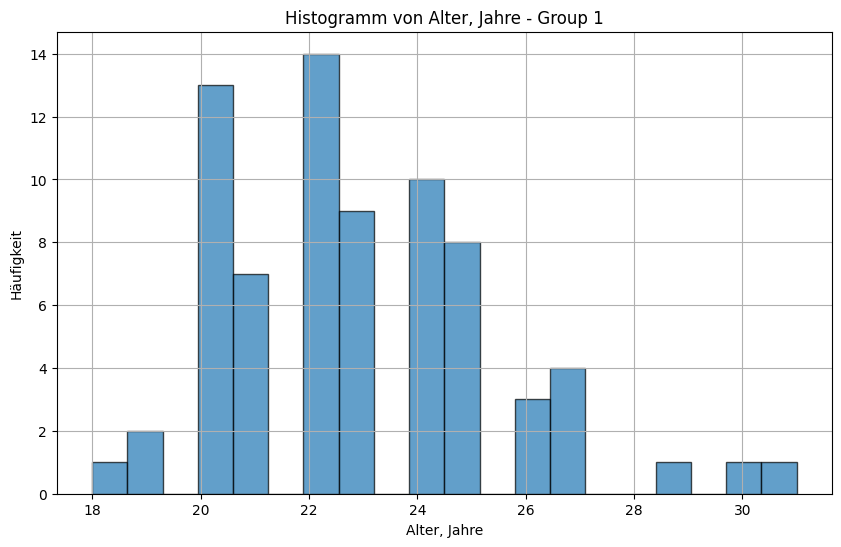

In [8]:
histo_save_path = '../graphs_and_tables/histograms'
# Create histograms for age in each group
analysis.create_histogram(group1, 'Alter, Jahre', 'Group 1')

Histogram of age for Group 2

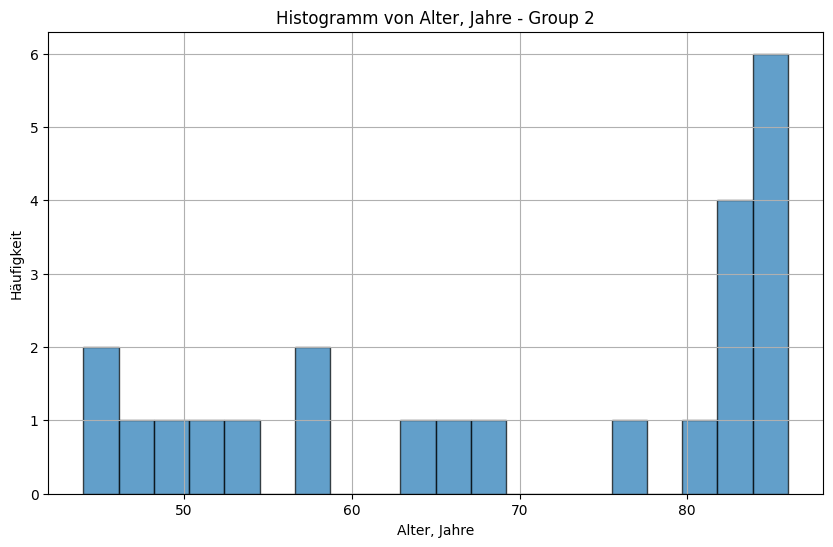

In [9]:
analysis.create_histogram(group2, 'Alter, Jahre', 'Group 2')

Histogram of age for overall Group 

'../graphs_and_tables/histograms/histogram_Overall Group_Alter, Jahre.png'

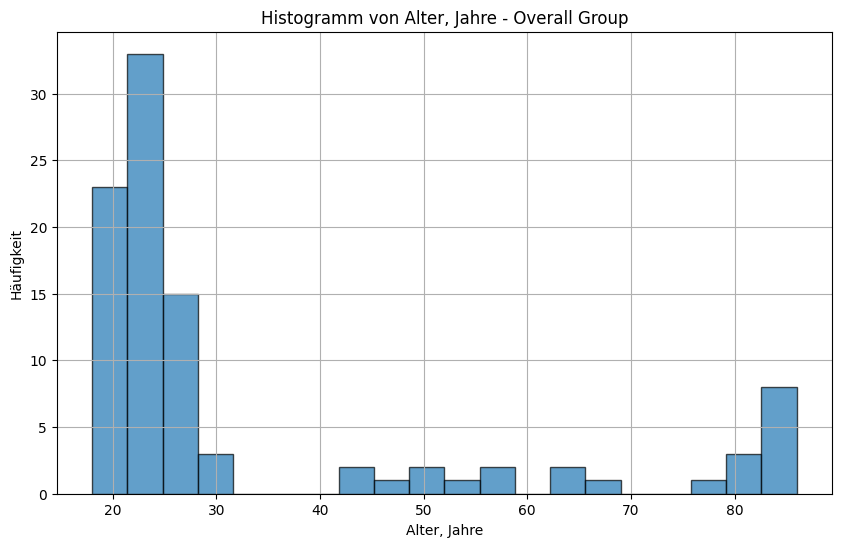

In [10]:
analysis.create_histogram(overall, 'Alter, Jahre', 'Overall Group', histo_save_path)

### Is the Age Distribution in the Overall Group Normally Distributed?
To determine if the age distribution in the overall group is normally distributed, we used a Q-Q plot and the Shapiro-Wilk test.

1. Q-Q Plot:

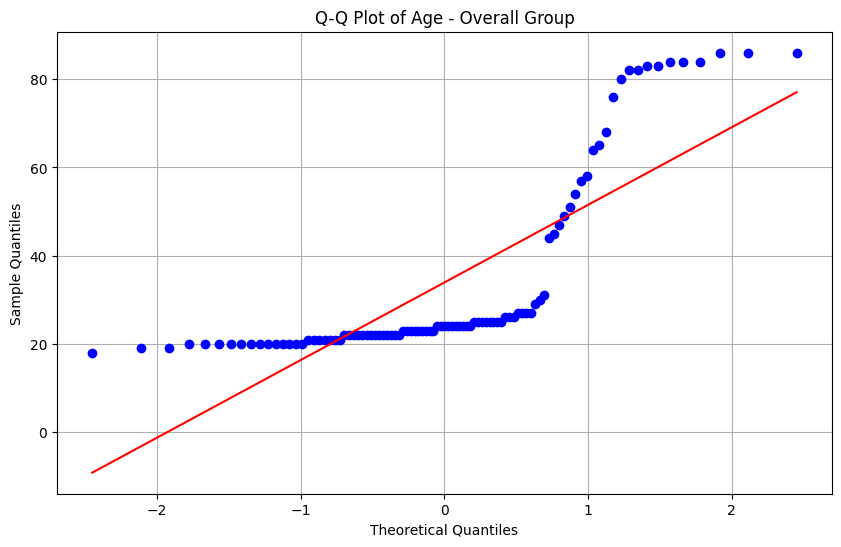

In [11]:
# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(df_clean['Alter, Jahre'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age - Overall Group')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

- Result: The Q-Q plot shows that the data points deviate significantly from the straight line, especially at the tails. This indicates that the data does not follow a normal distribution

2. Shapiro-Wilk Test:

In [12]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_clean['Alter, Jahre'])
shapiro_test

ShapiroResult(statistic=0.6506636654160828, pvalue=7.388226014361211e-14)

- Result: The Shapiro-Wilk test returned a statistic of 0.6507 and a p-value of 7.39×10 −14
 . This p-value is significantly less than 0.05, indicating that we reject the null hypothesis of normal distribution.

- Conclusion:


Based on the Q-Q plot, which shows significant deviations from the straight line, and the Shapiro-Wilk test (p < 0.05), we conclude that the age distribution in the overall group is not normally distributed.

### Scatterplot and Line Plot for BMI vs. Age for the Overall Group

- Scatter Plot:
The scatter plot will show individual data points representing the BMI and age of each participant.

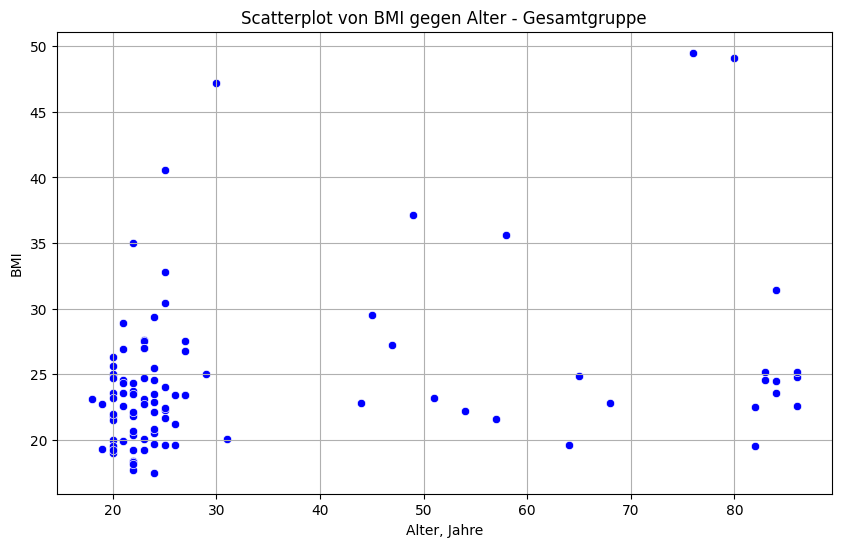

In [13]:
# Define the overall group data
overall_age = df_clean['Alter, Jahre']
overall_bmi = df_clean['BMI']

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=overall_age, y=overall_bmi, color='blue')
plt.title('Scatterplot von BMI gegen Alter - Gesamtgruppe')
plt.xlabel('Alter, Jahre')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

- Line Plot:
The line plot can show the trend or average BMI across different age groups.

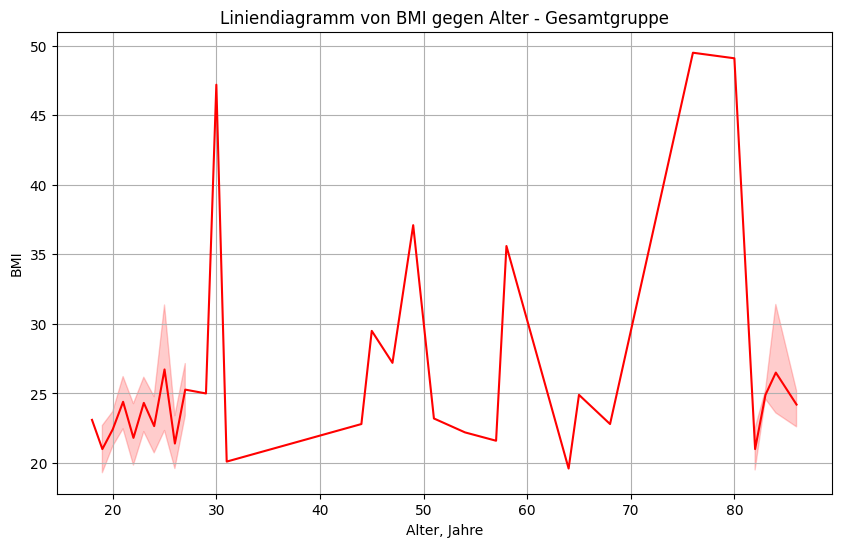

In [14]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=overall_age, y=overall_bmi, color='red')
plt.title('Liniendiagramm von BMI gegen Alter - Gesamtgruppe')
plt.xlabel('Alter, Jahre')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

### Bar Chart for Gender Distribution in the Overall Group

/tmp/ipykernel_23625/3079375058.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=custom_colors)


Text(0, 0.5, 'Anzahl der Teilnehmer')

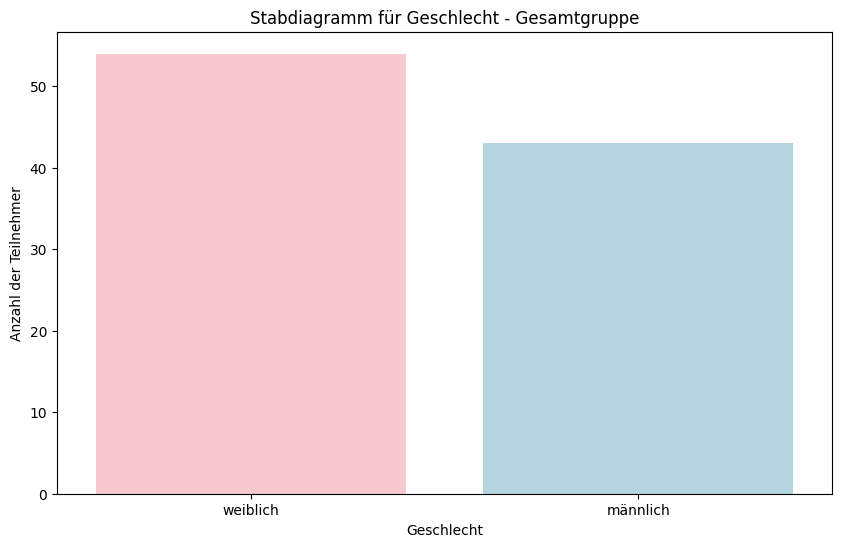

In [15]:
# Count the number of male and female participants
gender_counts = df_clean['Geschlecht'].value_counts()

# Define custom colors
custom_colors = ['pink', 'lightblue']  # Example colors, switch as needed

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=custom_colors)
plt.title('Stabdiagramm für Geschlecht - Gesamtgruppe')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Teilnehmer')

### Box Plots for various parameters

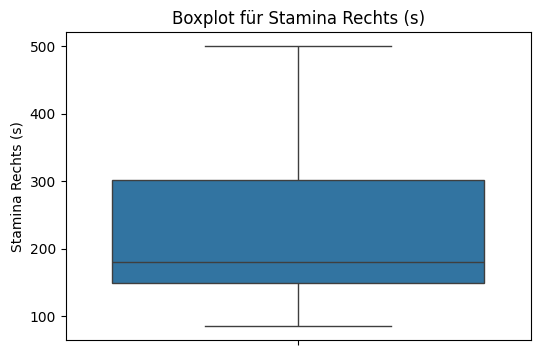

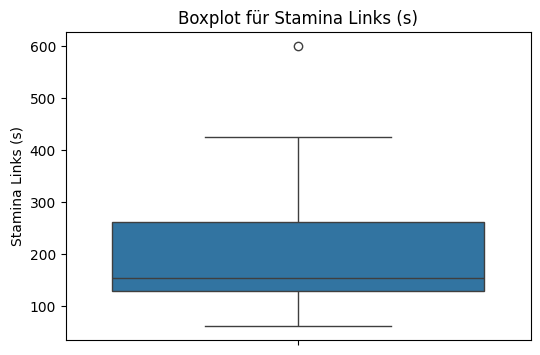

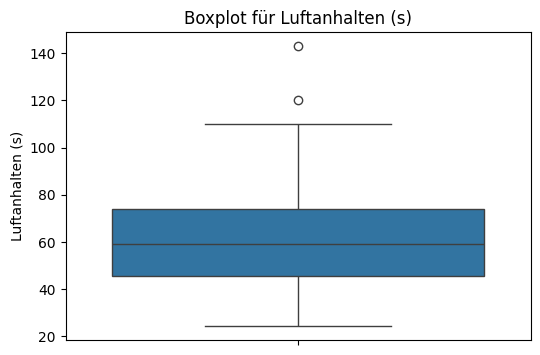

In [16]:
# Create a box plot for Stamina with Glass - Right Hand
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_clean['Stamina Rechts (s)'])
plt.title('Boxplot für Stamina Rechts (s)')
plt.ylabel('Stamina Rechts (s)')
plt.show()

# Create a box plot for Stamina with Glass - Left Hand
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_clean['Stamina Links (s)'])
plt.title('Boxplot für Stamina Links (s)')
plt.ylabel('Stamina Links (s)')
plt.show()

# Create a box plot for Breath-Holding
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_clean['Luftanhalten (s)'])
plt.title('Boxplot für Luftanhalten (s)')
plt.ylabel('Luftanhalten (s)')
plt.show()

## Statistical Tests
We will use t-tests, ANOVA, chi-square tests, Mann-Whitney U test, and Wilcoxon tests to assess differences and associations in the data.

- Are the groups of the same age (statistically)?


Given that we already know the age distribution in the overall group is not normally distributed, we will use the Mann-Whitney U test to determine if there are statistically significant differences in age between the two groups.

In [19]:
# Split data into groups
group1 = df_clean[df_clean['Gruppe'] == 1]['Alter, Jahre']
group2 = df_clean[df_clean['Gruppe'] == 2]['Alter, Jahre']

# Mann-Whitney U Test
mannwhitney_result = stats.mannwhitneyu(group1, group2)
print(f'Mann-Whitney U Test: {mannwhitney_result}')

Mann-Whitney U Test: MannwhitneyuResult(statistic=0.0, pvalue=4.349432793865435e-13)


Results: The p-value is significantly less than 0.05, indicating a statistically significant difference in ages between the groups.

- Is the BMI the same across all groups (statistically)?

To determine if the BMI is statistically the same across all groups, we will compare the BMI distributions between the groups using appropriate statistical tests.

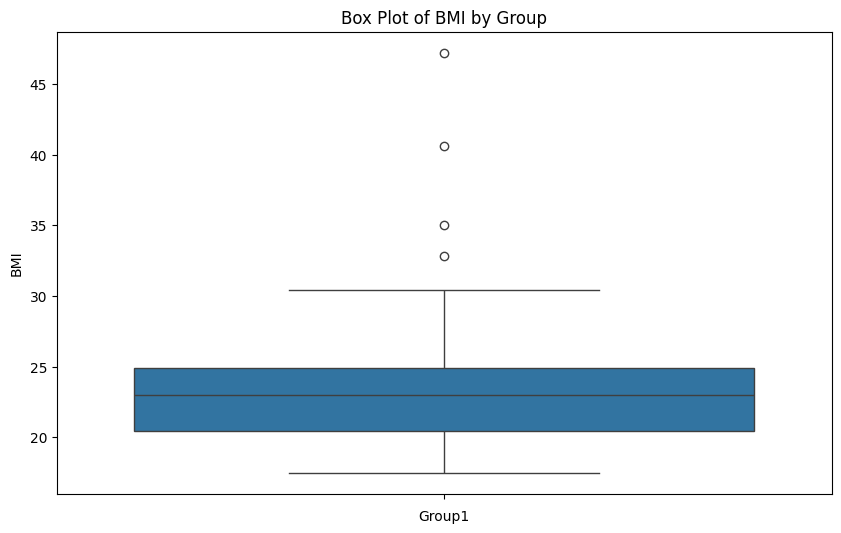

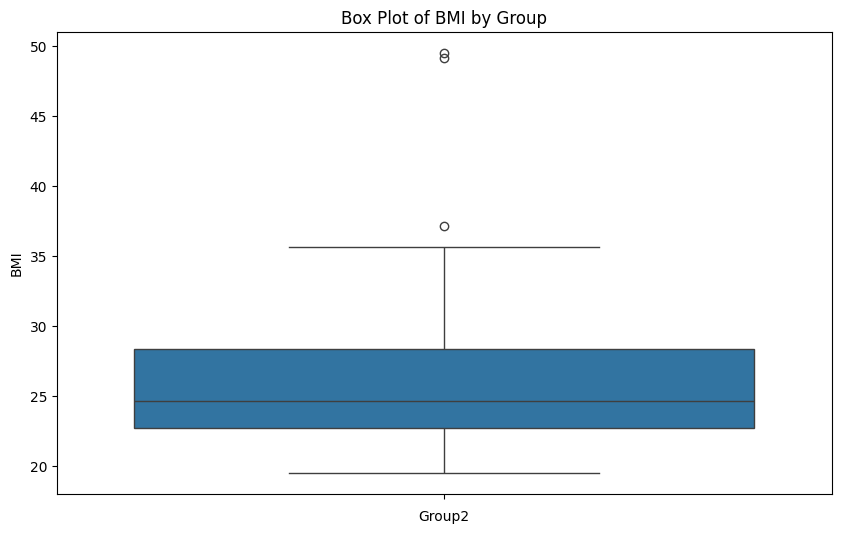

Kruskal-Wallis Test: KruskalResult(statistic=5.34360429658507, pvalue=0.02079842743215255)


In [32]:
# Split data into groups
group1 = df_clean[df_clean['Gruppe'] == 1]['BMI']
group2 = df_clean[df_clean['Gruppe'] == 2]['BMI']


# Visual Inspection: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=group1)
plt.title('Box Plot of BMI by Group')
plt.xlabel('Group1')
plt.ylabel('BMI')
plt.show()
# Visual Inspection: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=group2)
plt.title('Box Plot of BMI by Group')
plt.xlabel('Group2')
plt.ylabel('BMI')
plt.show()

# Normality Test
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)

# Choose the appropriate test based on normality
if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
    # Use ANOVA test
    anova_result = stats.f_oneway(group1, group2)
    print(f'ANOVA Test: {anova_result}')
else:
    # Use Kruskal-Wallis test
    kruskal_result = stats.kruskal(group1, group2)
    print(f'Kruskal-Wallis Test: {kruskal_result}')

Result: The Kruskal-Wallis test indicates a statistically significant difference in BMI between the groups (Kruskal-Wallis Test: statistic = 5.344, p-value = 0.021). Therefore, the BMI is not statistically the same across all groups.

- Is the gender distribution the same across groups (statistically)?

To determine if the gender distribution is statistically the same across different groups, we will use the chi-square test of independence.

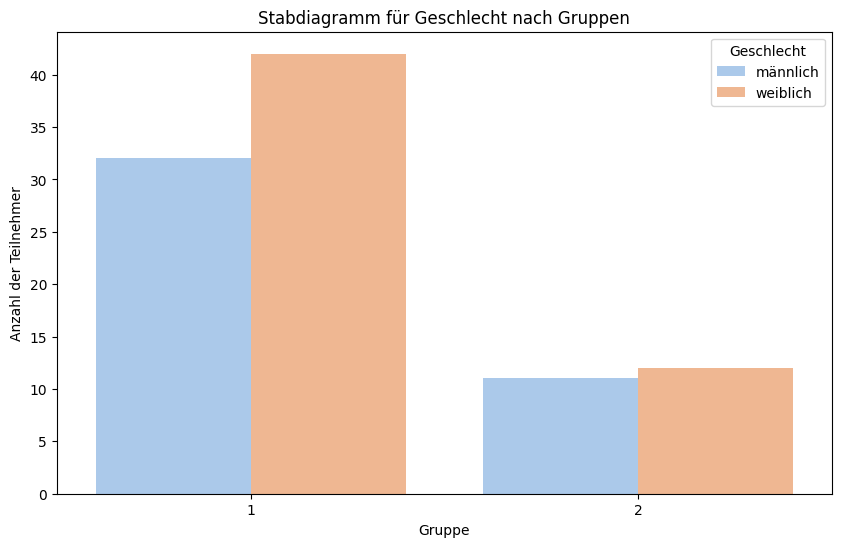

Chi-square Test: chi2 = 0.021359643263081058, p-value = 0.8838034599072255


In [33]:
# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(df_clean['Geschlecht'], df_clean['Gruppe'])

# Visual Inspection: Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Gruppe', hue='Geschlecht', data=df_clean, palette='pastel')
plt.title('Stabdiagramm für Geschlecht nach Gruppen')
plt.xlabel('Gruppe')
plt.ylabel('Anzahl der Teilnehmer')
plt.legend(title='Geschlecht')
plt.show()

# Chi-square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square Test: chi2 = {chi2}, p-value = {p}')

Result:
The chi-square test indicates no statistically significant difference in gender distribution between the groups (Chi-square Test: chi2 = 0.021, p-value = 0.884). Therefore, the gender distribution is statistically the same across all groups.

-  Is the stamina different between the left and right arm in Group 1 (statistically)?

To determine if there is a statistically significant difference in stamina between the left and right arms in Group 1, we will compare the paired measurements using appropriate statistical tests.

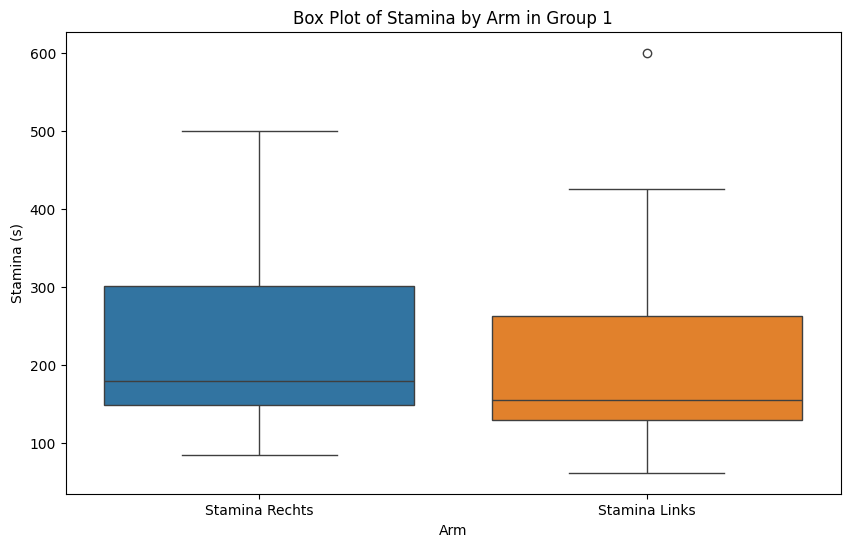

Shapiro-Wilk Test for Paired Differences: ShapiroResult(statistic=0.9184571860488508, pvalue=0.00027883954118173844)
Wilcoxon Signed-Rank Test: WilcoxonResult(statistic=477.0, pvalue=5.857289694287801e-05)


In [28]:
# Extract stamina data for Group 1
group1_stamina_right = df_clean[(df_clean['Gruppe'] == 1) & (df_clean['Stamina Rechts (s)'].notnull())]['Stamina Rechts (s)']
group1_stamina_left = df_clean[(df_clean['Gruppe'] == 1) & (df_clean['Stamina Links (s)'].notnull())]['Stamina Links (s)']

# Visual Inspection: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[group1_stamina_right, group1_stamina_left])
plt.xticks([0, 1], ['Stamina Rechts', 'Stamina Links'])
plt.title('Box Plot of Stamina by Arm in Group 1')
plt.xlabel('Arm')
plt.ylabel('Stamina (s)')
plt.show()

# Normality Test
shapiro_test = stats.shapiro(group1_stamina_right - group1_stamina_left)
print(f'Shapiro-Wilk Test for Paired Differences: {shapiro_test}')

# Choose the appropriate test based on normality
if shapiro_test.pvalue > 0.05:
    # Use paired samples t-test
    ttest_result = stats.ttest_rel(group1_stamina_right, group1_stamina_left)
    print(f'Paired Samples t-test: {ttest_result}')
else:
    # Use Wilcoxon signed-rank test
    wilcoxon_result = stats.wilcoxon(group1_stamina_right, group1_stamina_left)
    print(f'Wilcoxon Signed-Rank Test: {wilcoxon_result}')

Result:
- Shapiro-Wilk Test for Paired Differences: ShapiroResult(statistic=0.918, pvalue=0.00027883954118173844)

The p-value is less than 0.05, indicating that the paired differences are not normally distributed.

- Wilcoxon Signed-Rank Test: WilcoxonResult(statistic=477.0, pvalue=5.857289694287801e-05)

The p-value is significantly less than 0.05, indicating a statistically significant difference in stamina between the left and right arms in Group 1.


Therefore, we conclude that there is a statistically significant difference in stamina between the left and right arms in Group 1.